In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline,UnivariateSpline

# CONSTANTES
mu0 = 4*np.pi*1e-7     # permeabilidade do vácuo [H/m]
N = 90                 # número de espiras
g = 0.45e-3            # entreferro [m]
lg = 2*g               # dois entreferros
lf = 0.20              # comprimento médio no ferro [m]
R = 0.063              # Raio 6,3 cm
D = 0.08               # Profundidade 8 cm
arco_polo_rad = np.radians(30) # Polos de 30 graus
A0 = R * (30 * np.pi / 180) * D    # Área máxima correta (~0.002639 m²)


# CURVA B × H
B_data = np.array([0.000, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])

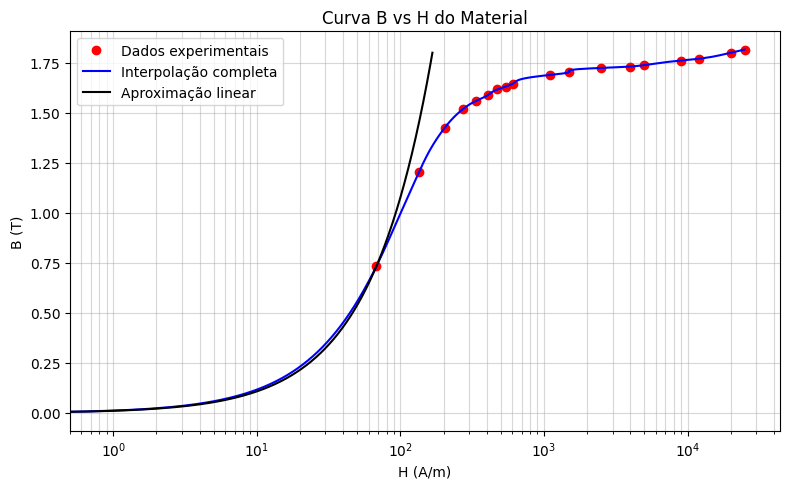

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 1. Dados extraídos da sua tabela
# H [A/m] (Campo Magnético)
CampoMagnetico = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609,
                           1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])

# B [T] (Densidade de Fluxo)
DensidadeCampo = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646,
                           1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.80, 1.816])

# 2. Dados para a Aproximação Linear (usando os dois primeiros pontos para definir a reta)
# Conforme o gráfico de exemplo, a reta preta segue a tendência inicial
CampoMagnetico_linear = CampoMagnetico[:2]
DensidadeCampo_linear = DensidadeCampo[:2]

# 3. Interpolação cúbica (seguindo a lógica do seu código)
f_real = CubicSpline(DensidadeCampo, CampoMagnetico, bc_type='natural')
f_linear = CubicSpline(DensidadeCampo_linear, CampoMagnetico_linear, bc_type='natural')

# Geração de pontos para interpolação
num_pontos = 500
B_a = np.linspace(min(DensidadeCampo), max(DensidadeCampo), num_pontos)
H_a = f_real(B_a)

# Para a reta linear, limitamos o B para que a linha preta não cruze o gráfico inteiro
B_a_linear = np.linspace(0, 1.8, num_pontos)
H_linear_a = f_linear(B_a_linear)

# 4. Plotagem idêntica ao seu modelo
fig, ax = plt.subplots(figsize=(8, 5))

# Dados reais (bolinhas vermelhas)
ax.plot(CampoMagnetico, DensidadeCampo, 'ro', label='Dados experimentais')

# Curva interpolada (linha azul)
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')

# Reta de aproximação (linha preta)
ax.plot(H_linear_a, B_a_linear, 'k-', label='Aproximação linear')

# Configurações de layout
ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.set_xscale('log') # Escala logarítmica conforme solicitado
ax.set_xlim(left=0.5) # Ajuste para o log não dar erro no zero
ax.grid(True, which="both", ls="-", alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

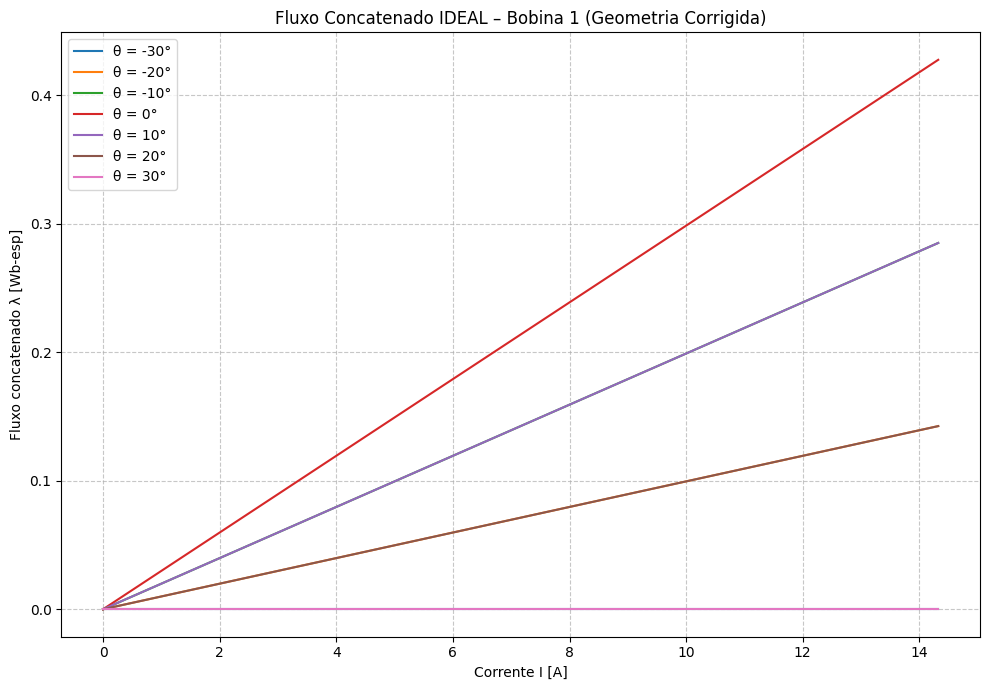

Corrente para atingir 1.8T em 0° (Ideal): 14.3239 A


In [ ]:

# DENSIDADE DE FLUXO
B = np.linspace(0, 1.8, 300)

# MODELO IDEAL
mu_ferro = 1e9 * mu0
Hf = B / mu_ferro
Hg = B / mu0

# CORRENTE
I = (Hf*lf + Hg*lg) / N

# ÁREA EFETIVA

def area_efetiva(theta_deg):
    """
    Para polos de 30°, a sobreposição varia linearmente.
    Máxima em 0° e zero em 30°.
    """
    theta_abs = abs(theta_deg)
    if theta_abs <= 30:
        return A0 * (1 - theta_abs/30)
    else:
        return 0

# ÂNGULOS
thetas = [-30, -20, -10, 0, 10, 20, 30]

# GRÁFICO
plt.figure(figsize=(10,7))

for th in thetas:
    A = area_efetiva(th)
    # λ = N * B * A
    lambda_ideal = N * B * A
    plt.plot(I, lambda_ideal, label=f'θ = {th}°')

plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Fluxo Concatenado IDEAL – Bobina 1 (Geometria Corrigida)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# CÁLCULO AUXILIAR
B_alvo = 1.8
Hg_alvo = B_alvo / mu0
I_18T = (Hg_alvo * lg) / N
print(f"Corrente para atingir 1.8T em 0° (Ideal): {I_18T:.4f} A")

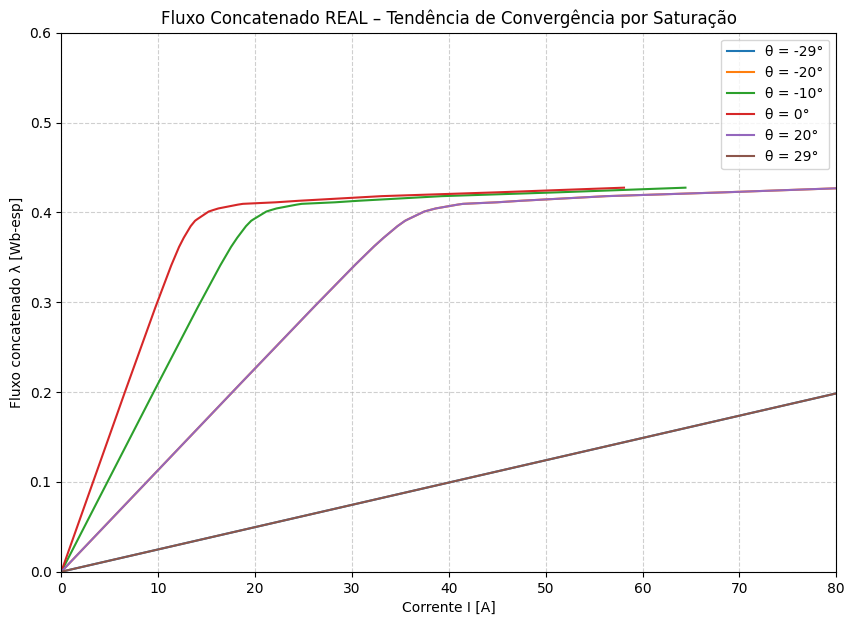

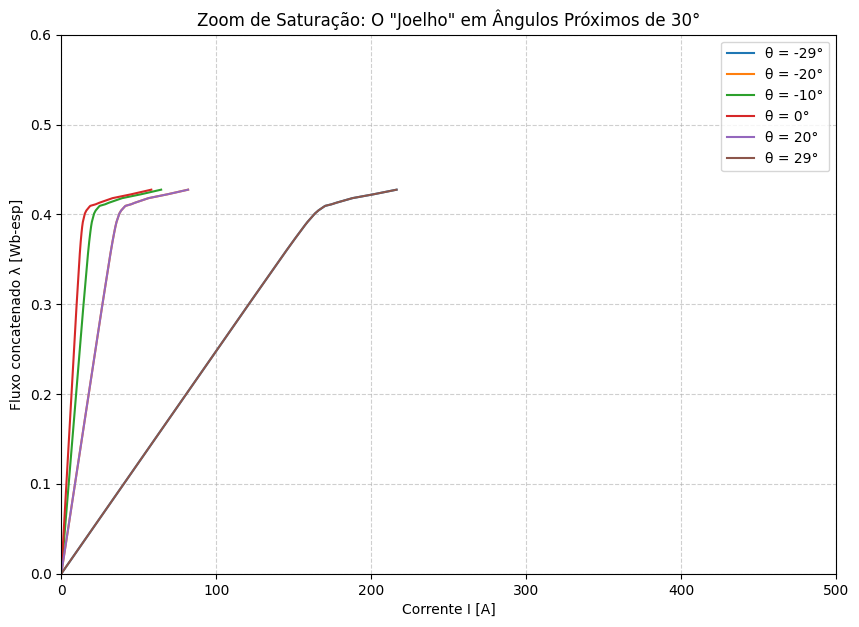

In [ ]:

def H_ferro(B):
    return np.interp(B, B_data, H_data)

# ÁREA EFETIVA + ÁREA DE DISPERSÃO
def area_efetiva(theta_deg):
    theta_abs = abs(theta_deg)
    A_overlap = A0 * max(0, (1 - theta_abs/30))
    return A_overlap + (0.05 * A0) # 5% de área de dispersão


# VARREDURA DE B
B_ferro = np.linspace(0, 1.8, 500)

# GRÁFICO ORIGINAL
plt.figure(figsize=(10, 7))
thetas = [-29,-20,-10,0,20,29]

for th in thetas:
    A_pos = area_efetiva(th)
    Bg = (B_ferro * A0) / A_pos
    I = (H_ferro(B_ferro)*lf + (Bg*lg)/mu0) / N
    lambda_real = N * B_ferro * A0
    plt.plot(I, lambda_real, label=f'θ = {th}°')

plt.xlim(0, 80)
plt.ylim(0, 0.6)
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Fluxo Concatenado REAL – Tendência de Convergência por Saturação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))

thetas_zoom = [-29,-20,-10,0,20,29]

for th in thetas_zoom:
    A_pos = area_efetiva(th)
    Bg = (B_ferro * A0) / A_pos
    I = (H_ferro(B_ferro)*lf + (Bg*lg)/mu0) / N
    lambda_real = N * B_ferro * A0
    plt.plot(I, lambda_real, label=f'θ = {th}°')

plt.xlim(0, 500)
plt.ylim(0, 0.6)
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Zoom de Saturação: O "Joelho" em Ângulos Próximos de 30°')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
#ACHANDO A CORRENTE IDEAL E REAL
B = 1.8                                             # Densidade de fluxo magnético no entreferro dado na questão

H_nucleo = H_ferro(B)                                # Campo magnético no núcleo a partir da interpolação
H_entreferro = B / mu0                               # Campo magnético no entreferro (H = B / μ0)

# Calculando a corrente aplicada
corrente_real = (H_nucleo * lf + 2 * H_entreferro * g) / N

corrente_ideal = (2 * H_entreferro * g) / N

print(f"A corrente aplicada necessária para gerar {B}T no entreferro é: {corrente_real:.4f} A")
print(f"A corrente ideal necessária para gerar {B}T no entreferro é: {corrente_ideal:.4f} A")

A corrente aplicada necessária para gerar 1.8T no entreferro é: 58.7684 A
A corrente ideal necessária para gerar 1.8T no entreferro é: 14.3239 A


In [ ]:
I_ideal = 14.3239
I_real = 58.7684

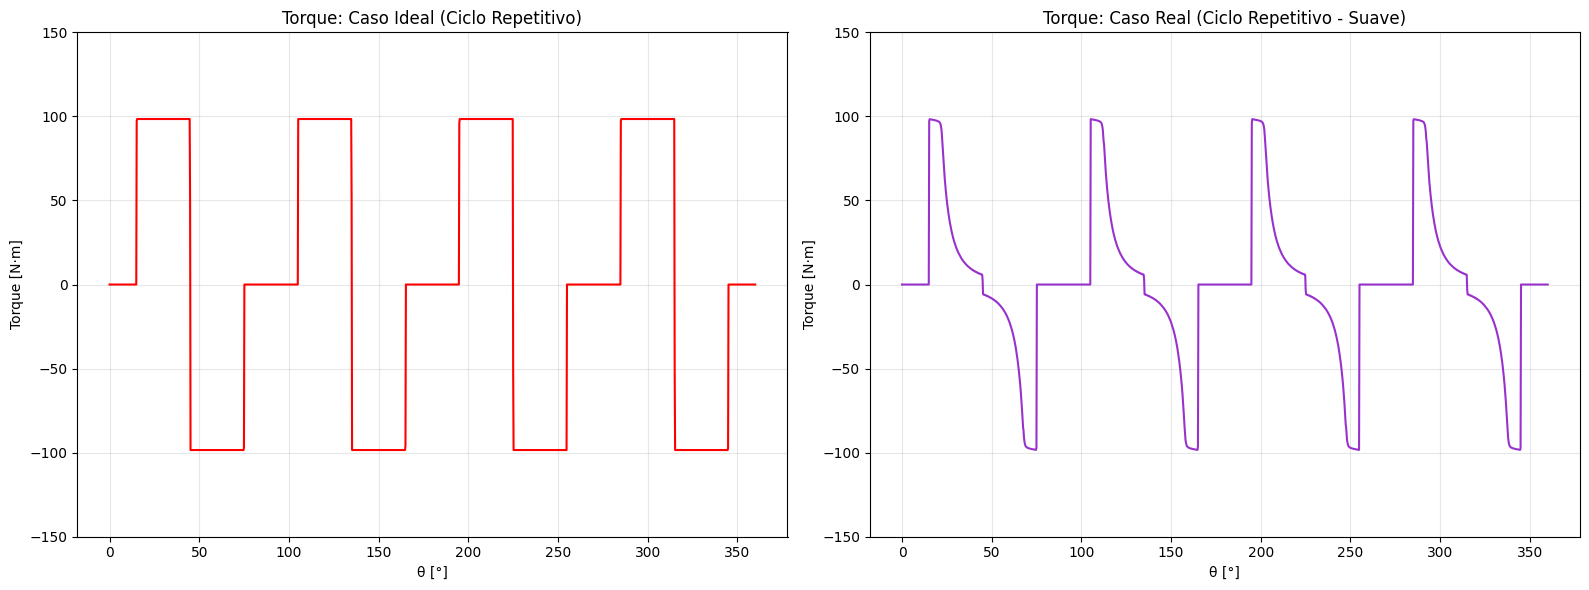

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- 1. DADOS DE ENTRADA (Página 2) ---
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
B_data = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.80, 1.816])
H_spline = CubicSpline(B_data, H_data) # [cite: 21]

# --- 2. PARÂMETROS DO MOTOR (Página 1) ---
N = 90             # [cite: 16]
lg = 0.45e-3       # [cite: 13]
r_rotor = 6.3e-2   # [cite: 14]
D = 8e-2           # [cite: 15]
mu0 = 4 * np.pi * 1e-7
A0 = np.radians(30) * r_rotor * D
lf = 0.25
I_trabalho = 58.77 # Corrente para 1.8T em 0° [cite: 28]

# --- 3. CÁLCULO DA CURVA SUAVE (BASE) ---
theta_base = np.linspace(-30, 30, 500) # De volta ao intervalo suave
theta_rad_base = np.radians(theta_base)
W_ideal_base = []
W_real_base = []

for th in theta_base:
    overlap = np.clip((1 - abs(th)/30), 1e-4, 1.0) # [cite: 12]
    # Caso Ideal
    L = (N**2 * mu0 * A0 * overlap) / (2 * lg)
    W_ideal_base.append(0.5 * L * I_trabalho**2)
    # Caso Real (Saturação)
    B_sweep = np.linspace(0, 1.9, 300)
    i_curva = (H_spline(B_sweep) * lf + 2 * (B_sweep/overlap * lg/mu0)) / N
    i_axis = np.linspace(0, I_trabalho, 200)
    lambda_interp = np.interp(i_axis, i_curva, N * B_sweep * A0)
    W_real_base.append(np.trapezoid(lambda_interp, i_axis))

T_ideal_base = np.gradient(W_ideal_base, theta_rad_base)
T_real_base = np.gradient(W_real_base, theta_rad_base)

# --- 4. REPETIÇÃO DO CICLO (0 a 360°) ---
theta_full = np.linspace(0, 360, 1500)
T_ideal_full = np.zeros_like(theta_full)
T_real_full = np.zeros_like(theta_full)

for i, th in enumerate(theta_full):
    # O motor 6/4 tem 4 polos no rotor, logo o ciclo se repete a cada 90°
    th_mod = (th % 90) - 45 # Centraliza a curva de torque no polo
    if -30 <= th_mod <= 30:
        idx = np.argmin(np.abs(theta_base - th_mod))
        T_ideal_full[i] = T_ideal_base[idx]
        T_real_full[i] = T_real_base[idx]

# --- 5. GRÁFICOS ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Ideal
ax1.plot(theta_full, T_ideal_full, color='red', lw=1.5)
ax1.set_title('Torque: Caso Ideal (Ciclo Repetitivo)', fontsize=12)
ax1.set_xlabel('θ [°]')
ax1.set_ylabel('Torque [N·m]')
ax1.set_ylim(-150, 150)
ax1.grid(True, alpha=0.3)

# Plot Real
ax2.plot(theta_full, T_real_full, color='darkorchid', lw=1.5)
ax2.set_title('Torque: Caso Real (Ciclo Repetitivo - Suave)', fontsize=12)
ax2.set_xlabel('θ [°]')
ax2.set_ylabel('Torque [N·m]')
ax2.set_ylim(-150, 150)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

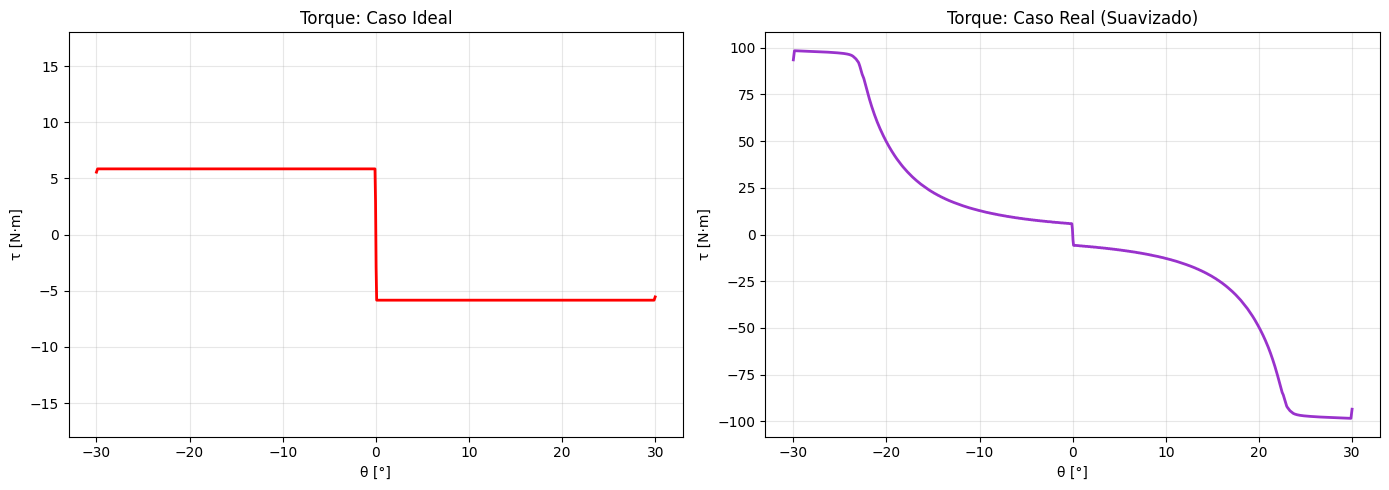

--------------------------------------------------
Estratégia do Controlador (100 RPM Anti-horário):
1. O sensor de posição identifica o início da sobreposição em -30°.
2. A corrente é aplicada na bobina 1 apenas no intervalo [-30°, 0°].
3. Em 0° (alinhamento total), a corrente deve ser cortada para evitar torque negativo.
4. O ciclo se repete para as outras fases para manter a rotação constante.
--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- 1. DADOS DE ENTRADA (Tabela BxH - Página 2) ---
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
B_data = np.array([0, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.80, 1.816])
H_spline = CubicSpline(B_data, H_data)

# --- 2. PARÂMETROS DO MOTOR (Página 1) ---
N = 90             # Espiras
lg = 0.45e-3       # Entreferro em metros
r_rotor = 6.3e-2   # Raio do rotor em metros
D = 8e-2           # Comprimento em metros
mu0 = 4 * np.pi * 1e-7
A0 = np.radians(30) * r_rotor * D # Área máxima (polos de 30°)
lf = 0.25          # Caminho médio no ferro (estimado)

# Correntes (Página 4)
I_ideal = 14.32
I_real = 58.77

# --- 3. CÁLCULO DO CO-TRABALHO ---
theta_deg = np.linspace(-30, 30, 1000)
theta_rad = np.radians(theta_deg)
W_prime_ideal = []
W_prime_real = []

# Varredura de fluxo para mapeamento
B_sweep = np.linspace(0, 1.9, 600)
lambda_sweep = N * B_sweep * A0

for th in theta_deg:
    # Função de sobreposição linear
    overlap = (1 - abs(th)/30)
    overlap = np.clip(overlap, 1e-4, 1.0)

    # Caso Ideal
    L_th = (N**2 * mu0 * (A0 * overlap)) / (2 * lg)
    W_prime_ideal.append(0.5 * L_th * (I_ideal**2))

    # Caso Real (Saturação)
    Bg = B_sweep / overlap
    i_curva = (H_spline(B_sweep) * lf + 2 * (Bg * lg / mu0)) / N

    # Interpolação para garantir suavidade
    i_axis = np.linspace(0, I_real, 400)
    lambda_interp = np.interp(i_axis, i_curva, lambda_sweep)
    W_prime_real.append(np.trapezoid(lambda_interp, i_axis))

# Torque T = dW'/dtheta
T_ideal = np.gradient(W_prime_ideal, theta_rad)
T_real = np.gradient(W_prime_real, theta_rad)

# --- 4. GRÁFICOS (Página 5) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Caso Ideal (Escala fixa para ver a "onda quadrada")
ax1.plot(theta_deg, T_ideal, color='red', lw=2)
ax1.set_title('Torque: Caso Ideal')
ax1.set_xlabel('θ [°]')
ax1.set_ylabel('τ [N·m]')
ax1.set_ylim(-18, 18)
ax1.grid(True, alpha=0.3)

# Plot Caso Real (Escala automática para ver a suavização/picos reais)
ax2.plot(theta_deg, T_real, color='darkorchid', lw=2)
ax2.set_title('Torque: Caso Real (Suavizado)')
ax2.set_xlabel('θ [°]')
ax2.set_ylabel('τ [N·m]')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- 5. RESPOSTA DO CONTROLADOR (Página 6) ---
print("-" * 50)
print("Estratégia do Controlador (100 RPM Anti-horário):")
print("1. O sensor de posição identifica o início da sobreposição em -30°.")
print("2. A corrente é aplicada na bobina 1 apenas no intervalo [-30°, 0°].")
print("3. Em 0° (alinhamento total), a corrente deve ser cortada para evitar torque negativo.")
print("4. O ciclo se repete para as outras fases para manter a rotação constante.")
print("-" * 50)

In [ ]:
# Definição das variáveis
rot_p_min = 100
rot_por_seg = rot_p_min / 60

# t representa o período (tempo de uma rotação completa em segundos)
t = 1 / rot_por_seg

# ta representa o tempo para percorrer 30 graus de um ciclo de 360
ta = t * (30 / 360)

# Exibição do resultado formatado em milissegundos (ms)
print(f'O acionamento da corrente de cada fase deve ocorrer em: {ta*1e3:.2f} ms')

O acionamento da corrente de cada fase deve ocorrer em: 50.00 ms


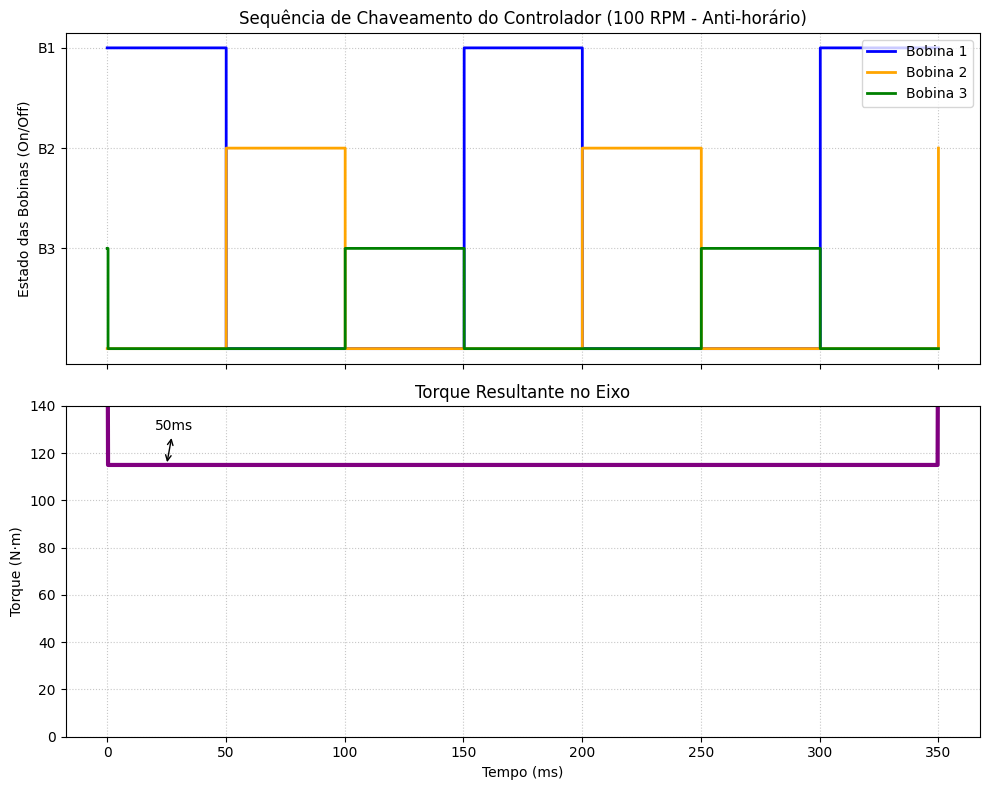

In [ ]:

#  Parâmetros de Tempo
# 100 RPM -> 600°/s. Para 30°, t = 30/600 = 0.05s (50ms)
t_passo = 0.05
t_total = 0.35 # Tempo para visualizar um ciclo completo e um pouco mais
t = np.linspace(0, t_total, 1000)

# Lógica de Chaveamento
# Bobina 1: Liga de 0 a 50ms, depois de 150 a 200ms...
b1 = np.where((t % 0.15 < 0.05), 1, 0)
# Bobina 2: Liga de 50 a 100ms, depois de 200 a 250ms...
b2 = np.where(((t - 0.05) % 0.15 < 0.05), 1, 0)
# Bobina 3: Liga de 100 a 150ms, depois de 250 a 300ms...
b3 = np.where(((t - 0.10) % 0.15 < 0.05), 1, 0)

#  Gráfico de Chaveamento
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot 1: Sinais de Controle
ax1.step(t*1000, b1 * 3, where='post', label='Bobina 1', color='blue', lw=2)
ax1.step(t*1000, b2 * 2, where='post', label='Bobina 2', color='orange', lw=2)
ax1.step(t*1000, b3 * 1, where='post', label='Bobina 3', color='green', lw=2)

ax1.set_title('Sequência de Chaveamento do Controlador (100 RPM - Anti-horário)')
ax1.set_ylabel('Estado das Bobinas (On/Off)')
ax1.set_yticks([1, 2, 3])
ax1.set_yticklabels(['B3', 'B2', 'B1'])
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(loc='upper right')


torque_total = (b1 + b2 + b3) * 115
ax2.plot(t*1000, torque_total, color='purple', lw=3, label='Torque Total')

ax2.set_title('Torque Resultante no Eixo')
ax2.set_xlabel('Tempo (ms)')
ax2.set_ylabel('Torque (N·m)')
ax2.set_ylim(0, 140)
ax2.grid(True, linestyle=':', alpha=0.7)


ax2.annotate('50ms', xy=(25, 115), xytext=(20, 130), arrowprops=dict(arrowstyle='<->'))

plt.tight_layout()
plt.show()

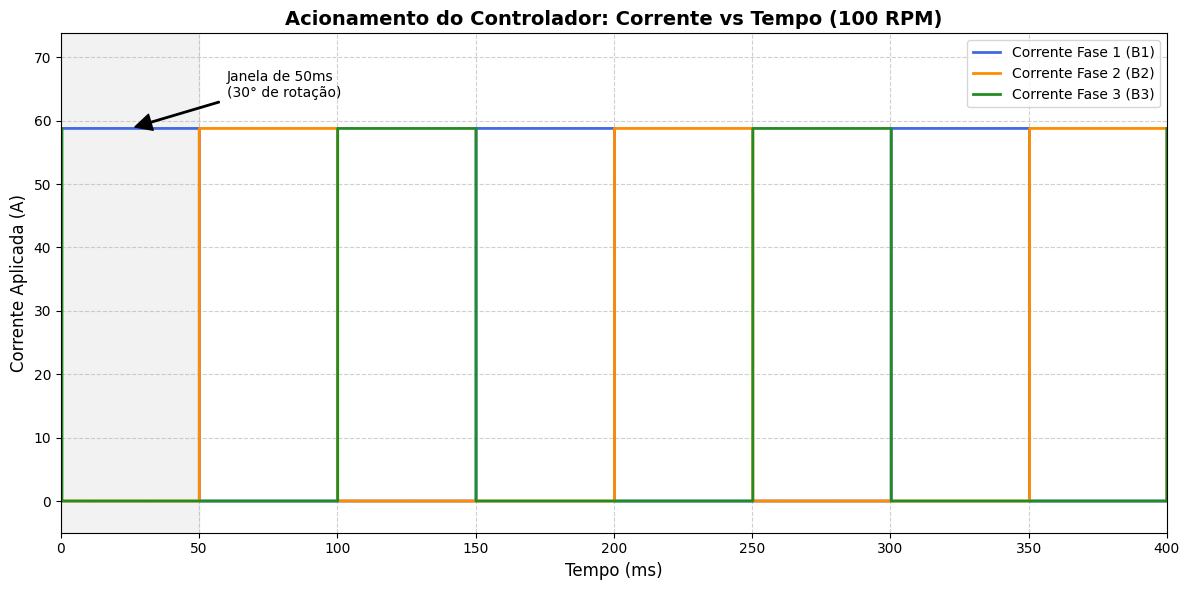

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parâmetros Calculados ---
# Velocidade = 100 RPM = 600°/s
# Tempo para percorrer 30° (largura do polo) = 30 / 600 = 0.05s (50ms)
t_on = 0.05
I_real = 58.77  # Corrente para atingir 1.8T no caso real
t_total = 0.4   # Tempo de visualização (400ms)
t = np.linspace(0, t_total, 1000)

# --- Lógica de Disparo (Sequência 1-2-3 para Anti-horário) ---
# Cada ciclo completo (B1+B2+B3) dura 150ms
periodo_ciclo = 0.15

# Bobina 1 (Fase 1)
i1 = np.where((t % periodo_ciclo < t_on), I_real, 0)
# Bobina 2 (Fase 2) - Atrasada em 50ms
i2 = np.where(((t - 0.05) % periodo_ciclo < t_on), I_real, 0)
# Bobina 3 (Fase 3) - Atrasada em 100ms
i3 = np.where(((t - 0.10) % periodo_ciclo < t_on), I_real, 0)

# --- Plotagem ---
plt.figure(figsize=(12, 6))

plt.step(t*1000, i1, label='Corrente Fase 1 (B1)', color='royalblue', lw=2, where='post')
plt.step(t*1000, i2, label='Corrente Fase 2 (B2)', color='darkorange', lw=2, where='post')
plt.step(t*1000, i3, label='Corrente Fase 3 (B3)', color='forestgreen', lw=2, where='post')

# Estética do Gráfico
plt.title('Acionamento do Controlador: Corrente vs Tempo (100 RPM)', fontsize=14, fontweight='bold')
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Corrente Aplicada (A)', fontsize=12)
plt.xlim(0, t_total * 1000)
plt.ylim(-5, I_real + 15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')

# Destacar o intervalo de 50ms
plt.axvspan(0, 50, color='gray', alpha=0.1)
plt.annotate('Janela de 50ms\n(30° de rotação)', xy=(25, I_real), xytext=(60, I_real+5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

Energia da Fonte: 6.1202 J
Trabalho Mecânico: 3.0601 J
Razão (Eficiência de Acionamento): 50.0%


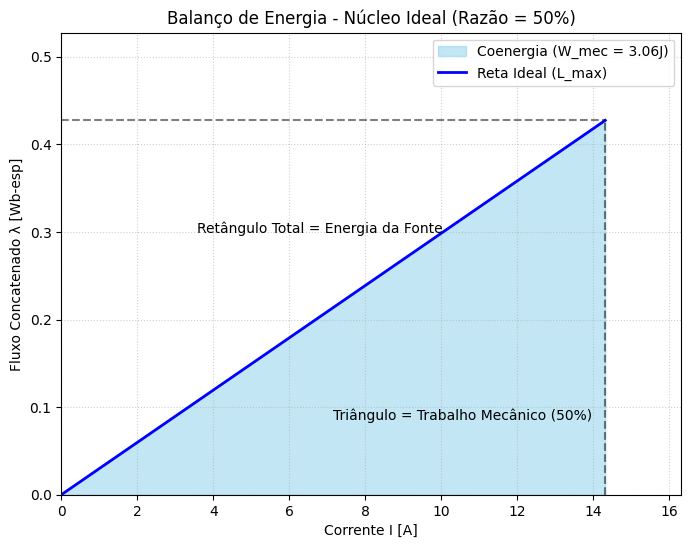

In [ ]:


# Cálculo da Indutância e Fluxo
L_max = (N**2 * mu0 * A0) / lg
lambda_max = L_max * I_ideal

#  Energias no Modelo Ideal
# No modelo linear:
# W_eletr = I * Delta_Lambda (Energia total da fonte)
# W_mec = 0.5 * I * Delta_Lambda (Área do triângulo / Coenergia)
W_eletr = I_ideal * lambda_max
W_mec = 0.5 * I_ideal * lambda_max
razao = W_mec / W_eletr

print(f"Energia da Fonte: {W_eletr:.4f} J")
print(f"Trabalho Mecânico: {W_mec:.4f} J")
print(f"Razão (Eficiência de Acionamento): {razao*100:.1f}%")

plt.figure(figsize=(8, 6))

# Reta característica Lambda x I (Linear)
i_range = np.linspace(0, I_ideal, 100)
l_range = L_max * i_range

# Área da Coenergia (Trabalho Mecânico) - Triângulo
plt.fill_between(i_range, l_range, color='skyblue', alpha=0.5, label=f'Coenergia (W_mec = {W_mec:.2f}J)')

# Área da Energia da Fonte (Retângulo Total)
plt.plot([0, I_ideal], [0, lambda_max], color='blue', lw=2, label='Reta Ideal (L_max)')
plt.plot([I_ideal, I_ideal], [0, lambda_max], 'k--', alpha=0.5)
plt.plot([0, I_ideal], [lambda_max, lambda_max], 'k--', alpha=0.5)

plt.title(f'Balanço de Energia - Núcleo Ideal (Razão = {razao*100:.0f}%)')
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo Concatenado λ [Wb-esp]')
plt.xlim(0, I_ideal + 2)
plt.ylim(0, lambda_max + 0.1)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.text(I_ideal/4, lambda_max*0.7, 'Retângulo Total = Energia da Fonte', fontsize=10)
plt.text(I_ideal/2, lambda_max*0.2, 'Triângulo = Trabalho Mecânico (50%)', fontsize=10)

plt.show()

Razão Real (Saturada): 85.56%


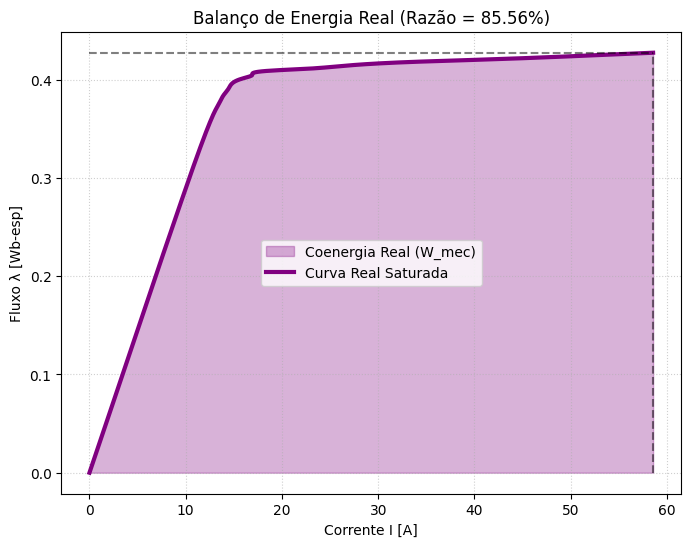

In [ ]:
# Cálculo da Curva Real (Posição Alinhada 0°)
B_sweep = np.linspace(0, 1.816, 1000)
I_curva = (H_spline(B_sweep) * lf + (B_sweep * lg) / mu0) / N
lambda_curva = N * B_sweep * A0

# Selecionar apenas até a corrente de operação
mask = I_curva <= I_real
I_final = I_curva[mask]
L_final = lambda_curva[mask]

# Energias Reais
# Substituindo np.trapz por np.trapezoid
W_mec_real = np.trapezoid(L_final, I_final)      # Coenergia (Trabalho)
W_eletr_real = I_final[-1] * L_final[-1]         # Energia Total da Fonte
razao_real = W_mec_real / W_eletr_real

print(f"Razão Real (Saturada): {razao_real*100:.2f}%")

# Plotagem
plt.figure(figsize=(8, 6))
plt.fill_between(I_final, L_final, color='purple', alpha=0.3, label=f'Coenergia Real (W_mec)')
plt.plot(I_final, L_final, color='purple', lw=3, label='Curva Real Saturada')

# Retângulo da Fonte
plt.plot([0, I_final[-1]], [L_final[-1], L_final[-1]], 'k--', alpha=0.5)
plt.plot([I_final[-1], I_final[-1]], [0, L_final[-1]], 'k--', alpha=0.5)

plt.title(f'Balanço de Energia Real (Razão = {razao_real*100:.2f}%)')
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo λ [Wb-esp]')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()